<a href="https://colab.research.google.com/github/IronZiiz/Data-Science_Time-Series/blob/main/Noise_Time_series_Analisys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Alucel - Sales analysis

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
alucel = pd.read_csv('/content/drive/MyDrive/Alura/Data-Science:Análise-de-Series-temporais/material curso - Time Series/alucel.csv')
alucel.head()

,dia,vendas
0,2018-10-01,1374.83
1,2018-10-02,2185.69
2,2018-10-03,1860.36
3,2018-10-04,1939.02
4,2018-10-05,1946.17


In [ ]:
alucel.dtypes

,0
dia,object
vendas,float64


In [ ]:
alucel['dia'] = pd.to_datetime(alucel['dia'])
alucel.dtypes

,0
dia,datetime64[ns]
vendas,float64


In [ ]:
print('Qntd de linhas e colunas:', alucel.shape)
print('Qntd de dados nulos:', alucel.isna().sum().sum())

Qntd de linhas e colunas: (61, 2)
Qntd de dados nulos: 0


In [ ]:
# Aumento
alucel['aumento'] = alucel['vendas'].diff()
alucel['aceleracao'] = alucel['aumento'].diff()
alucel.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,1374.83,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN
2,2018-10-03,1860.36,-325.33,-1136.19
3,2018-10-04,1939.02,78.66,403.99
4,2018-10-05,1946.17,7.15,-71.51


In [ ]:
def plot_comparacao(x, y1, y2, y3, dataset, titulo):
  plt.figure(figsize = (16,12))
  ax = plt.subplot(3, 1, 1)
  ax.set_title(titulo, fontsize = 18, loc = 'left')
  sns.lineplot(x = x, y = y1, data = dataset)
  plt.subplot(3, 1, 2)
  sns.lineplot(x = x, y = y2, data = dataset)
  plt.subplot(3, 1, 3)
  sns.lineplot(x = x, y = y3, data = dataset)
  plt.show()


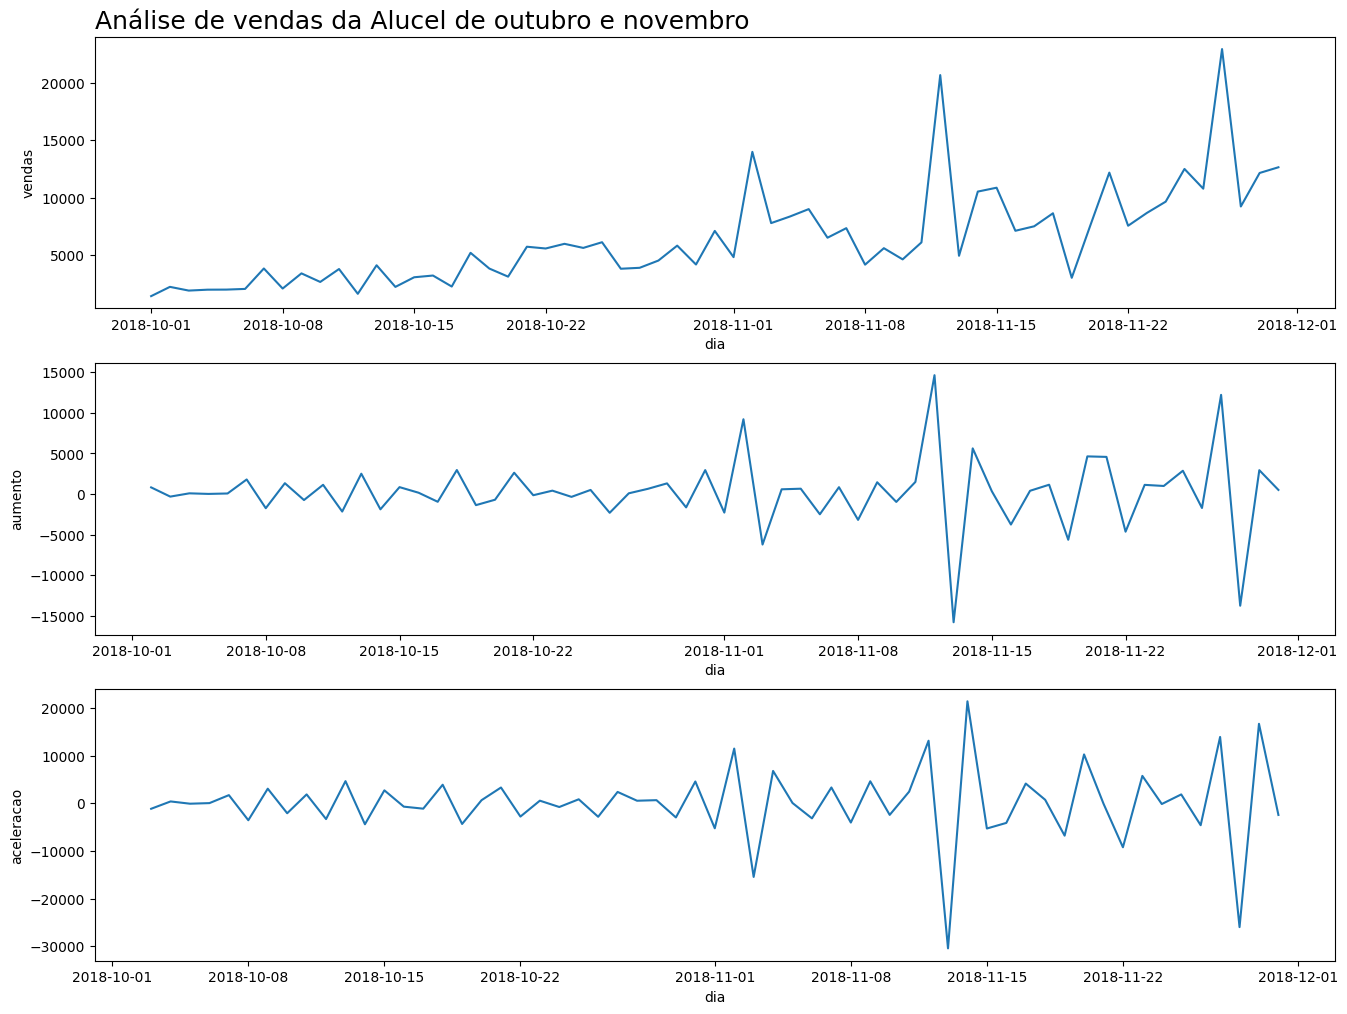

In [ ]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao', alucel, 'Análise de vendas da Alucel de outubro e novembro')


# Moving Average

It’s an attempt to normalize the data

In [ ]:
alucel['media_movel'] = alucel['vendas'].rolling(7).mean() # 7 days
alucel.head(7)                                             # mostrando que no sétimo 7 ele exibe um valor

,dia,vendas,aumento,aceleracao,media_movel,media_movel_21
0,2018-10-01,1374.83,NaN,NaN,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN,NaN,NaN
2,2018-10-03,1860.36,-325.33,-1136.19,NaN,NaN
3,2018-10-04,1939.02,78.66,403.99,NaN,NaN
4,2018-10-05,1946.17,7.15,-71.51,NaN,NaN
5,2018-10-06,2005.89,59.72,52.57,NaN,NaN
6,2018-10-07,3793.07,1787.18,1727.46,2157.861429,NaN


In [ ]:
def plotar(titulo, labelx, labely, x, y, dataset):
  sns.set_palette('Accent')
  sns.set_style('darkgrid')
  ax = sns.lineplot(x =x, y = y, data = dataset)
  ax.figure.set_size_inches(12,6)
  ax.set_title(titulo, loc = 'left', fontsize = 18)
  ax.set_xlabel('Mês',fontsize = 14)
  ax.set_ylabel('Vendas',fontsize = 14)
  plt.show()

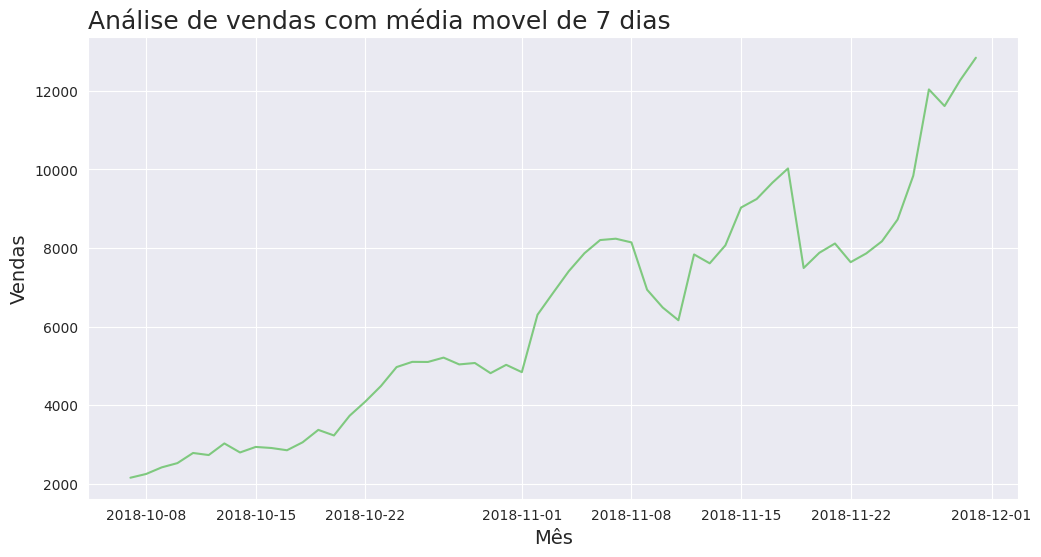

In [ ]:
plotar('Análise de vendas com média movel de 7 dias', 'Tempo', 'Media movel', 'dia', 'media_movel', alucel)

In [ ]:
# É possível alterar os dias
alucel['media_movel_21'] = alucel['vendas'].rolling(21).mean() # 21 days
alucel.head(21)                                             # mostrando que no sétimo 21 ele exibe um valor

,dia,vendas,aumento,aceleracao,media_movel,media_movel_21
0,2018-10-01,1374.83,NaN,NaN,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN,NaN,NaN
2,2018-10-03,1860.36,-325.33,-1136.19,NaN,NaN
3,2018-10-04,1939.02,78.66,403.99,NaN,NaN
4,2018-10-05,1946.17,7.15,-71.51,NaN,NaN
5,2018-10-06,2005.89,59.72,52.57,NaN,NaN
6,2018-10-07,3793.07,1787.18,1727.46,2157.861429,NaN
7,2018-10-08,2039.59,-1753.48,-3540.66,2252.827143,NaN
8,2018-10-09,3365.58,1325.99,3079.47,2421.382857,NaN
9,2018-10-10,2616.12,-749.46,-2075.45,2529.348571,NaN


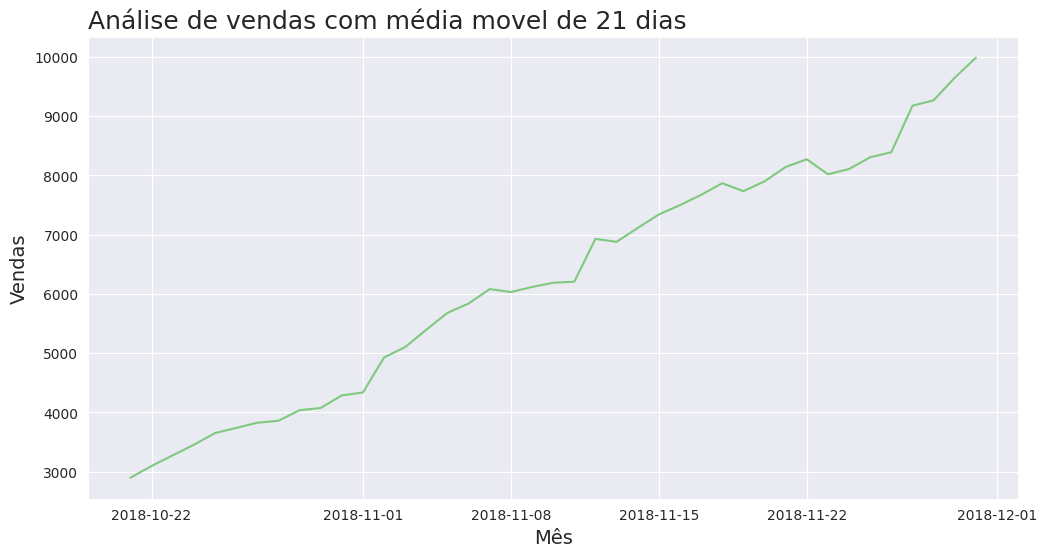

In [ ]:
# Cuidado, pois podemos perder informação
plotar('Análise de vendas com média movel de 21 dias', 'Tempo', 'Media movel', 'dia', 'media_movel_21', alucel)

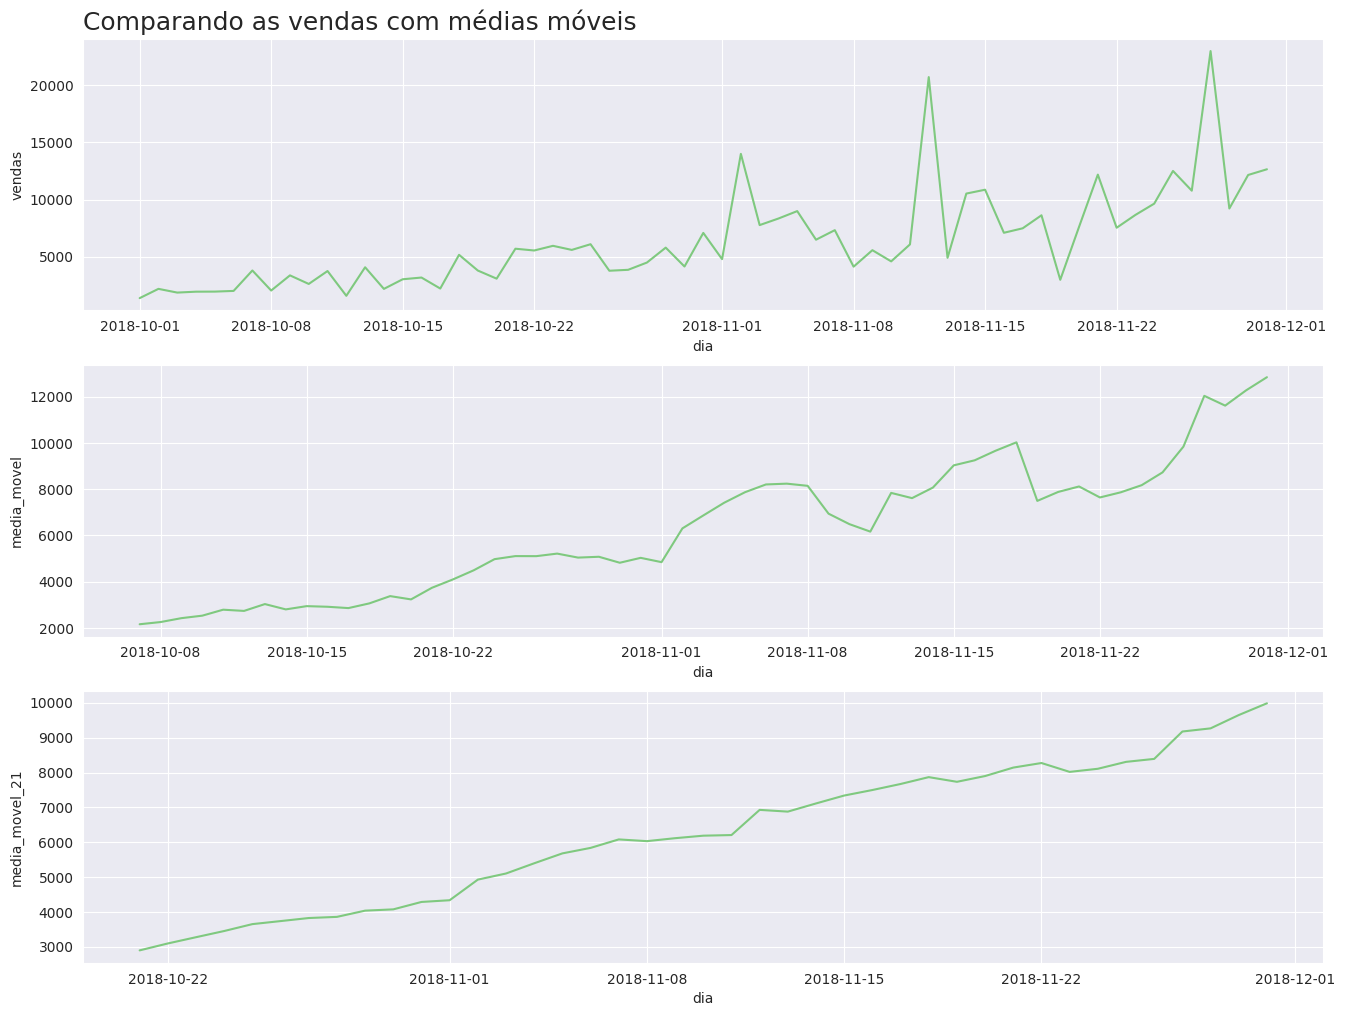

In [ ]:
plot_comparacao('dia', 'vendas', 'media_movel','media_movel_21', alucel, 'Comparando as vendas com médias móveis')